## **Marketing Analytics**

**Introduction**

The given dataset illustrates the marketing analysis after the recent campaign conducted by a certain company to undertand its customer needs and make sound decisions regarding the same. 

**Section 1:** Exploratory Data Analysis

1. Is there any variable that could be transformed?
2.  Is there any null value? How to remove them?
3. Is there any scope to generate new data from the given data?
4. Are there any outliers? 

**Section 2:** Statistical Analysis

1. Is age of the customer a significant factor for number of purchase?
2. Who have made the maximum purchase?
3. Is there a significant relationship between geographical regional and Income?
4. Which countries have made the maximum and mimimum amount of purchase? 

**Section 3:** Data Visualization

1. Which marketing campaign is most successful?
2. Which products is sold the most? 
3. Which country bought that product the most?
4. Which product is least sold among all?

In [77]:
#Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [79]:
#Load dataset
data=pd.read_csv('/content/marketing_data.csv')

In [ ]:
#Preliminary analysis to find info of the complete table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
data.shape

(2240, 28)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [54]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Children', 'Purchased', 'Customer_Age', 'TotalMnt', 'TotalPurchases',
       'TotalCampaignsAcc', 'Customer_age_grp'],
      dtype='object')

In [ ]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

# **1. Exploratory Data Analysis**

Check for null values

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Check for unique values

In [ ]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [ ]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Is there any variable that could be transformed?

Data type conversion

In [80]:
#convert into datetime datatype
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

Removing white space

In [81]:
#clean up column names that contain whitespace
data.columns = data.columns.str.replace(' ', '')

Data Transformation

In [82]:
#transform Income column to a numerical
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

In [ ]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

In [ ]:
data.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
data.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

# 2. Is there any null value? How to remove them?

In [83]:
#Remove null values
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [ ]:
#Check if there are any errors left
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

# 3. Is there any scope to generate new data from the given data?

In [84]:
#Club kids and teens together in children column
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [ ]:
data.Children

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Children, Length: 2240, dtype: int64

In [85]:
#Club purchase data together
data["Purchased"]=data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

In [86]:
#Age of a customer
data['Customer_Age'] = data['Dt_Customer'].dt.year - data['Year_Birth']

In [ ]:
data.Customer_Age

0       44
1       53
2       56
3       47
4       25
        ..
2235    37
2236    36
2237    36
2238    34
2239    43
Name: Customer_Age, Length: 2240, dtype: int64

In [87]:
# Total Amount Spent
mnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalMnt'] = data[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in data.columns if 'Purchases' in col]
data['TotalPurchases'] = data[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in data.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
data['TotalCampaignsAcc'] = data[campaigns_cols].sum(axis=1)

# view new features, by customer ID
data[['ID', 'Children', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head(20)

,ID,Children,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,1190,15,1
1,1,0,577,18,2
2,10476,1,251,11,0
3,1386,2,11,4,0
4,5371,1,91,8,2
5,7348,0,1192,17,1
6,4073,0,1215,28,2
7,1991,1,96,7,0
8,4047,1,544,20,0
9,9477,1,544,20,0


In [88]:
# list of cols with binary responses
binary_cols = [col for col in data.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in data.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in data.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [ ]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Purchased,Customer_Age,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,15,44,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,18,53,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,11,56,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,4,47,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,8,25,91,8,2
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,0,17,56,1192,17,1
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER,0,28,60,1215,28,2
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP,1,7,47,96,7,0
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US,1,20,60,544,20,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND,1,20,60,544,20,0


In [ ]:
data.shape

(2240, 34)

Drop columns which are no longer needed

In [89]:
#drop unique ID
data.drop(columns=['ID', 'Dt_Customer','Kidhome','Teenhome'], inplace=True)

# 4. Are there any outliers?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


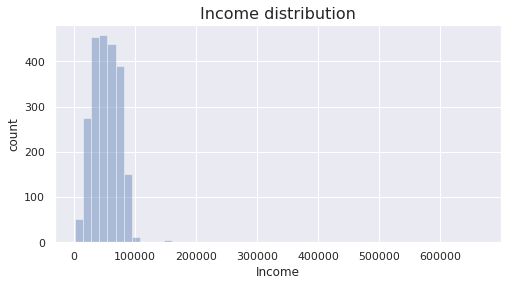

In [ ]:
#graph to represent income distribution
plt.figure(figsize=(8,4))
sns.distplot(data['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

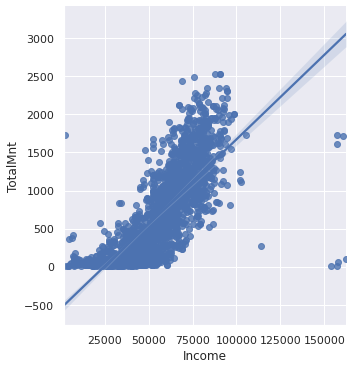

In [61]:
sns.lmplot(x='Income', y='TotalMnt', data=data[data['Income'] < 200000]);

# **2. Statistical Analysis**

In [65]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Children', 'Purchased', 'Customer_Age', 'TotalMnt', 'TotalPurchases',
       'TotalCampaignsAcc', 'Customer_age_grp'],
      dtype='object')

# 1.   Is age of the customer a significant factor for number of purchase?



In [51]:
data['Customer_age_grp'] = pd.cut(data.Customer_Age, bins=[18,35,50,75], labels=['Youth','Middle','Old'])

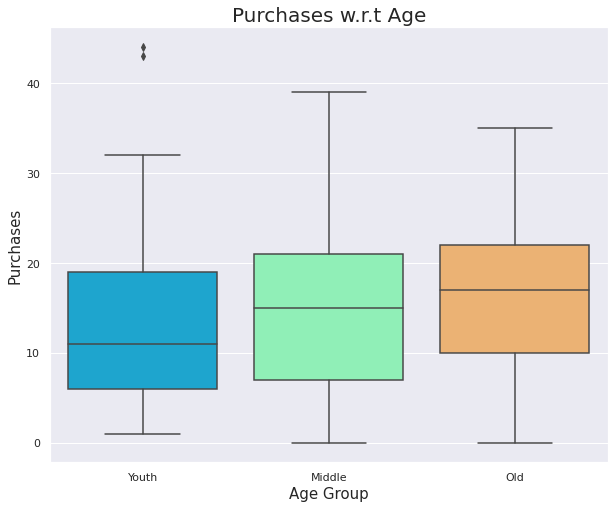

In [60]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Customer_age_grp', y='TotalPurchases', data=data, palette='rainbow')
plt.title('Purchases w.r.t Age', fontsize=20)
plt.xlabel('Age Group',fontsize=15)
plt.ylabel('Purchases',fontsize=15);

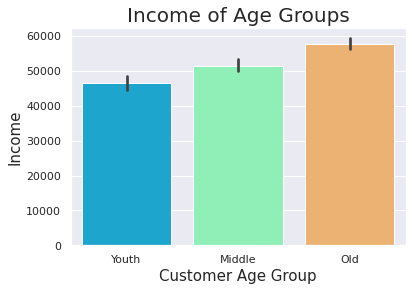

In [52]:
sns.barplot(x='Customer_age_grp', y='Income', data=data, palette='rainbow')
plt.title('Income of Age Groups', fontsize=20)
plt.xlabel('Customer Age Group',fontsize=15)
plt.ylabel('Income',fontsize=15);

# 2. Who have made the maximum purchase?




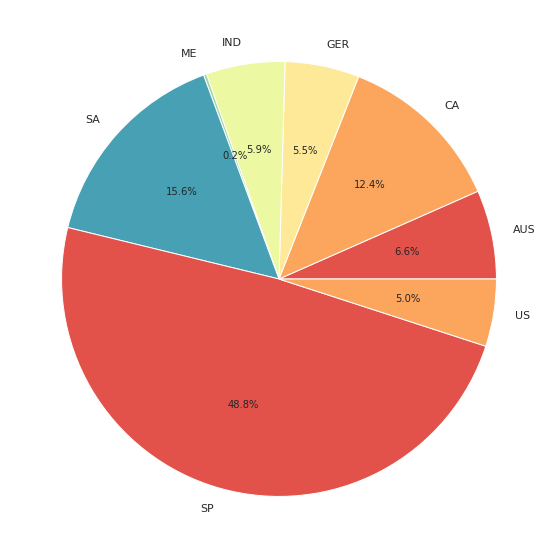

In [68]:
purchase = data[['TotalMnt', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (10, 10))
plt.pie(purchase['TotalMnt']['sum'], labels = purchase.index, autopct = '%1.1f%%')
plt.show()

# 3. Is there a significant relationship between geographical regional and Income?




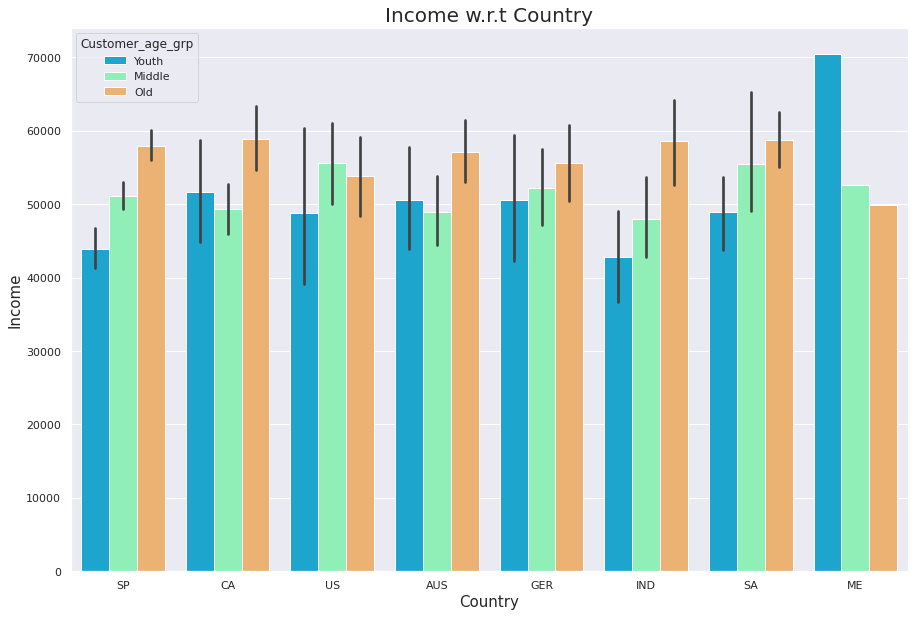

In [59]:
plt.figure(figsize=(15,10))

sns.barplot(x='Country', y='Income', hue='Customer_age_grp', data=data, palette='rainbow')
plt.title('Income w.r.t Country', fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Income',fontsize=15);

# 4. Which countries have made the maximum and mimimum amount of purchase?




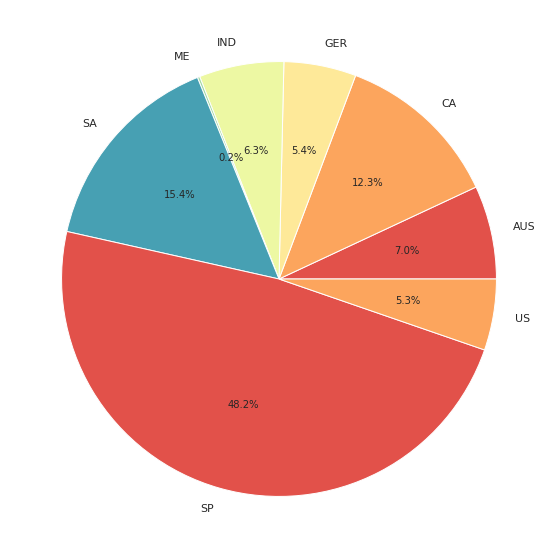

In [64]:
purchase = data[['TotalPurchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (10, 10))
plt.pie(purchase['TotalPurchases']['sum'], labels = purchase.index, autopct = '%1.1f%%')
plt.show()

*One-Hot Encoding*

In [90]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
# get categorical features and review number of unique values
cat = data.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())
# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)
# merge with numeric data
num = data.drop(columns=cat.columns)
data = pd.concat([cat_encoded, num], axis=1)
data.head()

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Children,Purchased,Customer_Age,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,15,44,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,18,53,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,11,56,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,4,47,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,8,25,91,8,2


In [ ]:
#Join
data["Marital_Status_Bachelor"]=data["Marital_Status_Alone"]+data["Marital_Status_Single"]+data["Marital_Status_YOLO"]+data["Marital_Status_Absurd"]

#drop unique ID
data.drop(columns=['Marital_Status_Alone', 'Marital_Status_Single','Marital_Status_YOLO','Marital_Status_Absurd'], inplace=True)

data[['Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_Bachelor']].head(20)

,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Marital_Status_Bachelor
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


# **3. Data Visualization**

**Box Plots**

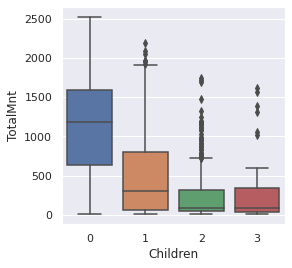

In [ ]:
#TotalMnt vs Children
plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='TotalMnt', data=data);

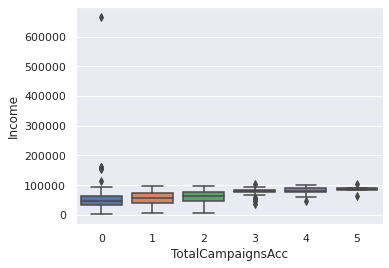

In [ ]:
#Income vs TotalCampaignAcc
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data);

After removal of outliers

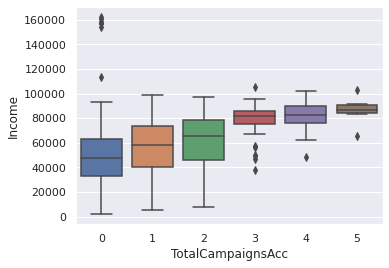

In [ ]:
#Income vs TotalChampaignAcc
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data[data['Income']<200000]);

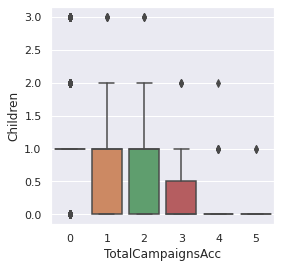

In [ ]:
#TotalChampaignAcc vs Children
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalCampaignsAcc', y='Children', data=data);

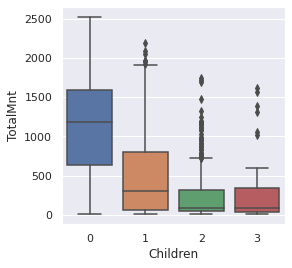

In [ ]:
#TotalMnt vs Children
plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='TotalMnt', data=data);

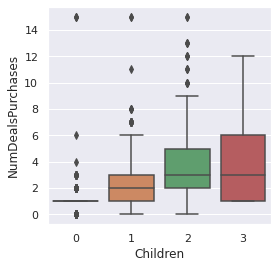

In [ ]:
#NumDealPurchase vs Children
plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='NumDealsPurchases', data=data);

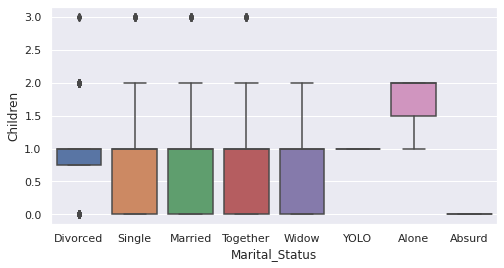

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Marital_Status', y='Children', data=data);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


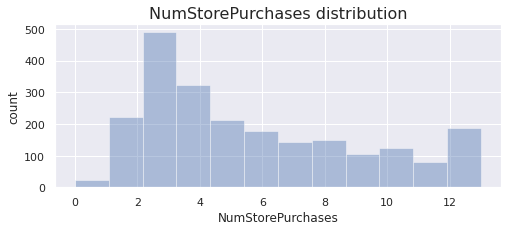

In [ ]:
#graph of number of store purchase
plt.figure(figsize=(8,3))
sns.distplot(data['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

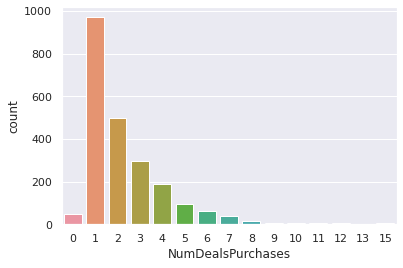

In [ ]:
sns.countplot(x='NumDealsPurchases',data=data)

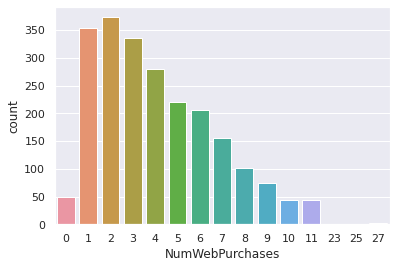

In [ ]:
sns.countplot(x='NumWebPurchases',data=data)


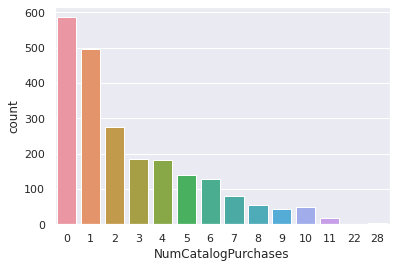

In [ ]:
sns.countplot(x='NumCatalogPurchases',data=data)


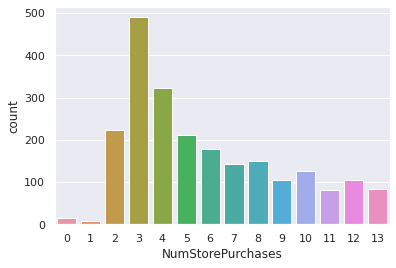

In [ ]:
sns.countplot(x='NumStorePurchases',data=data)

**Bar Graph**

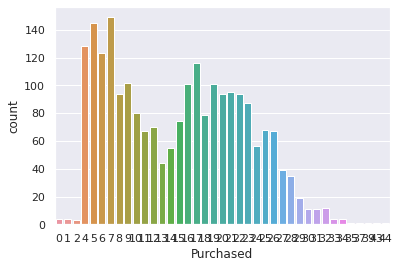

In [ ]:
sns.countplot(x='Purchased',data=data)

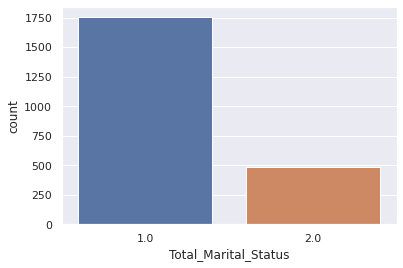

In [ ]:
sns.countplot(x='Total_Marital_Status',data=data)

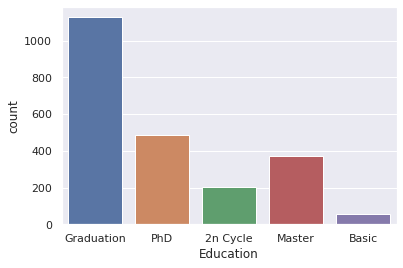

In [ ]:
sns.countplot(x='Education',data=data)

# 1. Which marketing campaign is most successful?

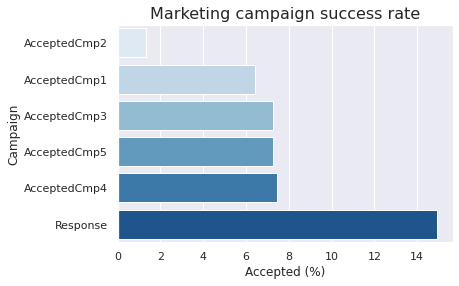

In [74]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

# **Model Training**

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = data.drop(columns='NumStorePurchases')
y = data['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.1720926077751955e-14
Median value of target variable:  5.0


Download csv file

In [94]:
from google.colab import files
data.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**



*   We can conclude that the most successful products are wine and meat. 
*   Advertising campaign acceptance is positively correlated with income and negatively correlated with having children. 
*The new campaign was the most successful advertising campaign and was especially successful in Spain.
*Web and store purchases were the most. 
*Despite Mexico having the highest youth income, they spend the least because company has least users from Mexico.



 


